<a href="https://colab.research.google.com/github/Tejaswini-08-2005/NLP/blob/main/NLP_Assignment_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
df = pd.read_csv("/content/Tweets.csv.zip")

# Inspect data
df[['text', 'airline_sentiment']].head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [10]:
df = df[['text', 'airline_sentiment']]
df.isnull().sum()


,0
text,0
airline_sentiment,0


In [11]:
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)      # Remove URLs
    text = re.sub(r'@\w+', '', text)                # Remove mentions
    text = re.sub(r'#\w+', '', text)                # Remove hashtags
    text = re.sub(r'[%s]' % string.punctuation, '', text)

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return ' '.join(tokens)


In [12]:
df['cleaned_text'] = df['text'].apply(clean_tweet)
df.head()


,text,airline_sentiment,cleaned_text
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


In [14]:
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['cleaned_text'])


In [15]:
tfidf_matrix = pd.DataFrame(
    X.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_matrix.head()


,aa,aadfw,aadv,aadvantage,aas,abc,abilities,ability,able,aboard,...,yr,yrs,yuma,yup,yvr,yyz,zero,zone,zoom,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
negative_df = df[df['airline_sentiment'] == 'negative']
negative_tfidf = tfidf.transform(negative_df['cleaned_text'])

negative_tfidf_df = pd.DataFrame(
    negative_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)


In [17]:
top_terms = negative_tfidf_df.mean().sort_values(ascending=False).head(15)
top_terms


,0
flight,0.043711
get,0.020618
cancelled,0.020406
service,0.017260
hold,0.016983
hours,0.016696
customer,0.014999
help,0.014403
time,0.013724
delayed,0.013365


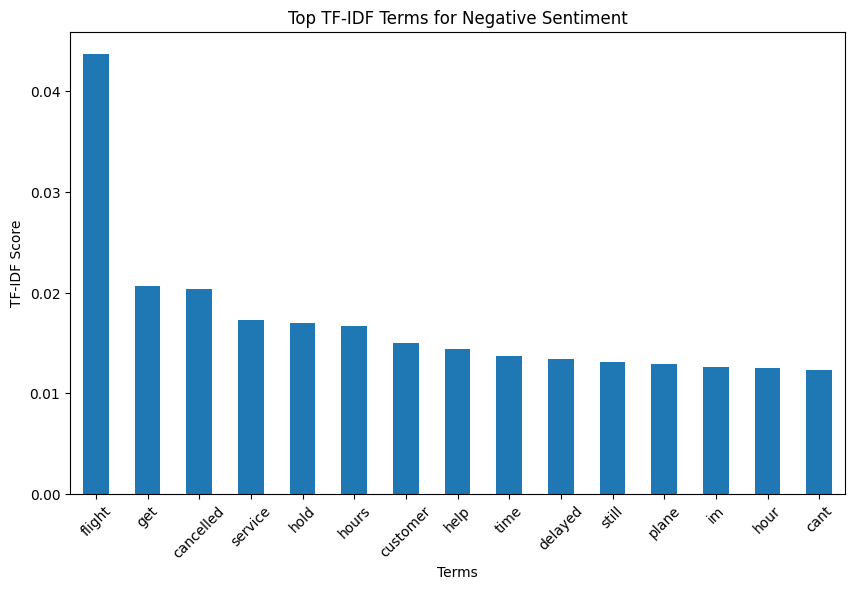

In [18]:
plt.figure(figsize=(10,6))
top_terms.plot(kind='bar')
plt.title('Top TF-IDF Terms for Negative Sentiment')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()


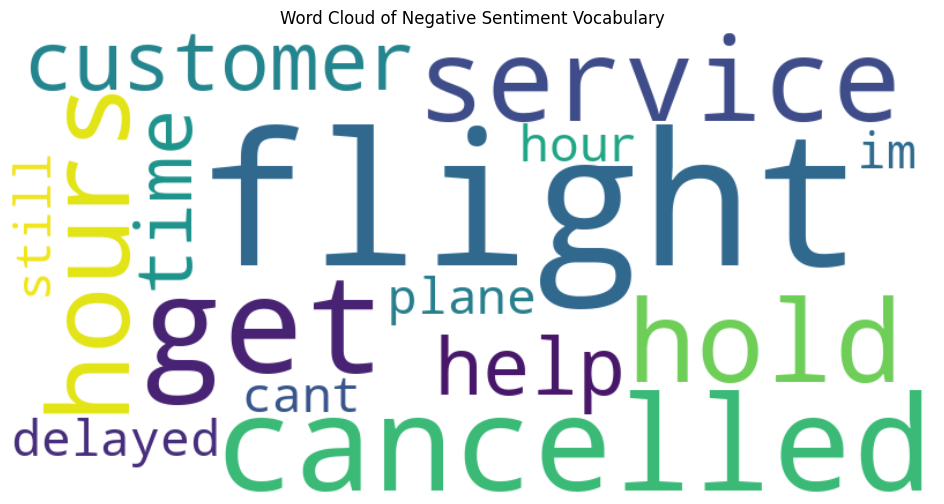

In [21]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(top_terms)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Vocabulary')
plt.show()
